# Cat vs Dogs Image Classifier

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 30-Oct-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

## 1. Introduction
This project focuses on building an image classifier to distinguish between images of cats and dogs using a Convolutional Neural Network (CNN). The dataset is from Kaggle's Dogs vs Cats competition. We'll preprocess the images, split them into training and test sets, and build a CNN model. Data augmentation is applied to improve generalization, and model performance will be evaluated using various metrics.

## 2. Data Preparation
Import Libraries and Set Up Kaggle API

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.


Download and Extract the Dataset

In [ ]:
# importing the dataset
!kaggle competitions download -c dogs-vs-cats

from zipfile import ZipFile
file_name = "/content/dogs-vs-cats.zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()

In [ ]:
# extracting the train file
from zipfile import ZipFile
with ZipFile('/content/train.zip', 'r') as zip:
  zip.extractall()
  print('done')

done


In [23]:
import os
from os import listdir
from os.path import isfile, join

mypath = "/content/train"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfiles))
print(onlyfiles[0:5])
os.listdir(mypath)

25000
['cat.11459.jpg', 'dog.592.jpg', 'dog.474.jpg', 'cat.12103.jpg', 'dog.6331.jpg']


['cat.11459.jpg',
 'dog.592.jpg',
 'dog.474.jpg',
 'cat.12103.jpg',
 'dog.6331.jpg',
 'cat.9136.jpg',
 'cat.2005.jpg',
 'cat.7728.jpg',
 'dog.3951.jpg',
 'dog.773.jpg',
 'cat.11273.jpg',
 'dog.5592.jpg',
 'cat.7004.jpg',
 'dog.10698.jpg',
 'cat.11425.jpg',
 'cat.10776.jpg',
 'cat.3387.jpg',
 'dog.9528.jpg',
 'dog.7478.jpg',
 'cat.7467.jpg',
 'cat.271.jpg',
 'dog.6441.jpg',
 'cat.5036.jpg',
 'dog.2775.jpg',
 'cat.6118.jpg',
 'cat.341.jpg',
 'dog.9952.jpg',
 'cat.4283.jpg',
 'dog.10283.jpg',
 'dog.10765.jpg',
 'dog.501.jpg',
 'dog.11605.jpg',
 'dog.8477.jpg',
 'cat.2451.jpg',
 'dog.6173.jpg',
 'cat.8471.jpg',
 'cat.1285.jpg',
 'dog.285.jpg',
 'dog.6575.jpg',
 'dog.11700.jpg',
 'dog.4397.jpg',
 'dog.9599.jpg',
 'cat.7872.jpg',
 'cat.9519.jpg',
 'dog.2634.jpg',
 'dog.8091.jpg',
 'cat.2747.jpg',
 'dog.5567.jpg',
 'cat.6631.jpg',
 'dog.6122.jpg',
 'cat.10396.jpg',
 'dog.4817.jpg',
 'dog.9485.jpg',
 'dog.7757.jpg',
 'cat.9541.jpg',
 'cat.10195.jpg',
 'cat.7368.jpg',
 'dog.6193.jpg',
 'dog.179

In [24]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import seaborn as sns
import os
from os import listdir
from os.path import isfile, join
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

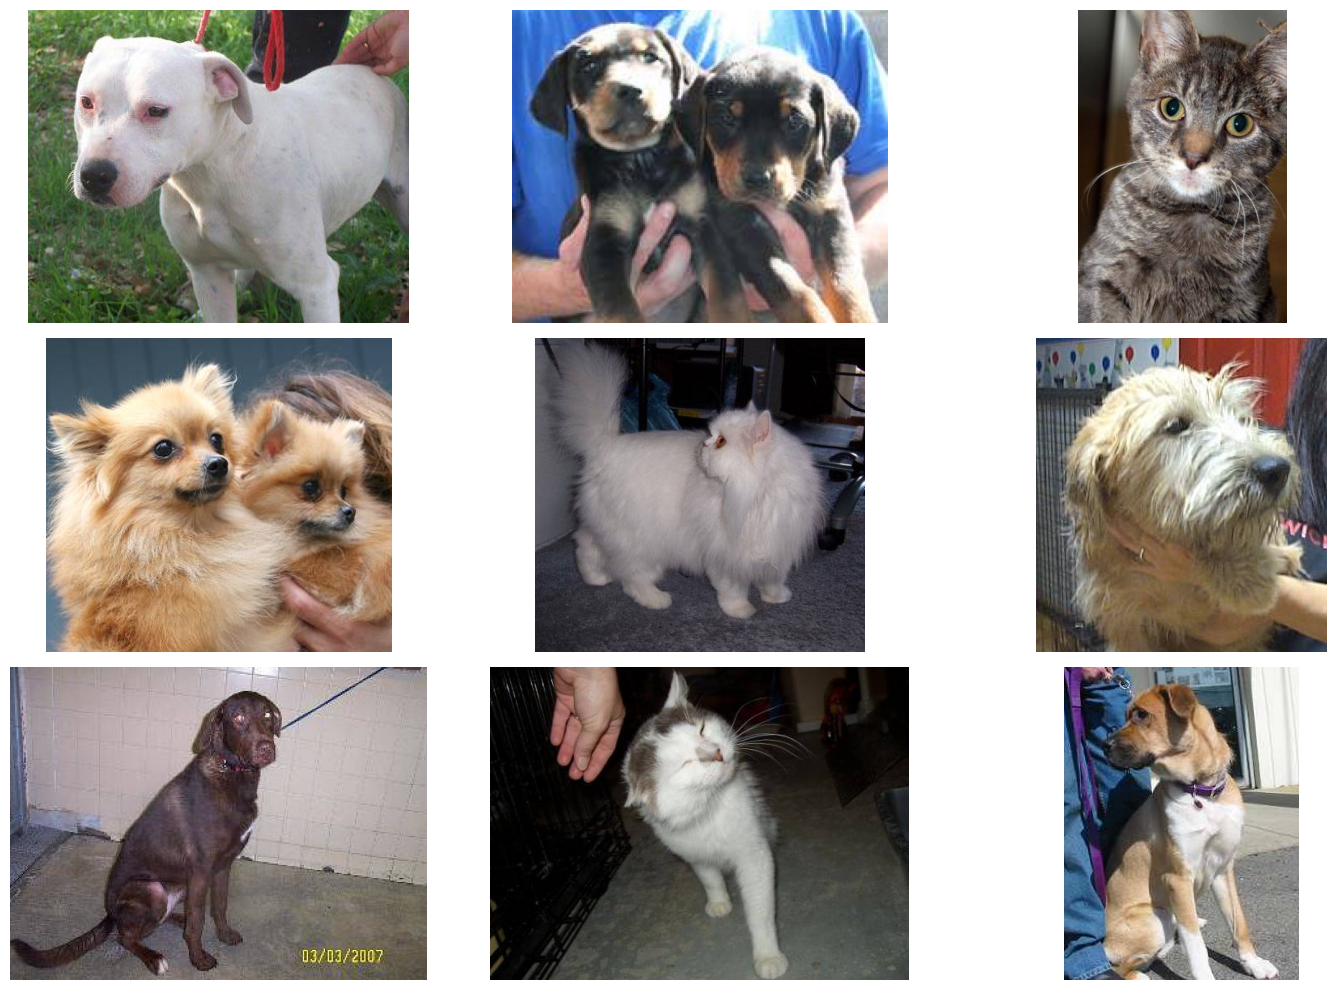

In [3]:
# displaying the sample images
def plot_images(image_paths, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.ravel()

    for i in range(rows * cols):
        if i < len(image_paths):
            img = mpimg.imread(image_paths[i])
            axes[i].imshow(img)
            axes[i].axis('off')
        else:
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

num_images_to_show = 9
random_image_indices = random.sample(range(len(onlyfiles)), num_images_to_show)
selected_image_paths = [os.path.join(mypath, onlyfiles[i]) for i in random_image_indices]

plot_images(selected_image_paths, 3, 3)

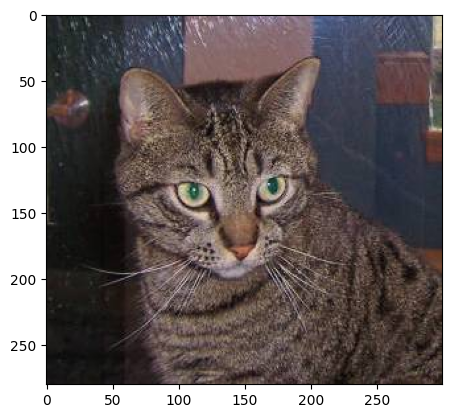

(300, 280)


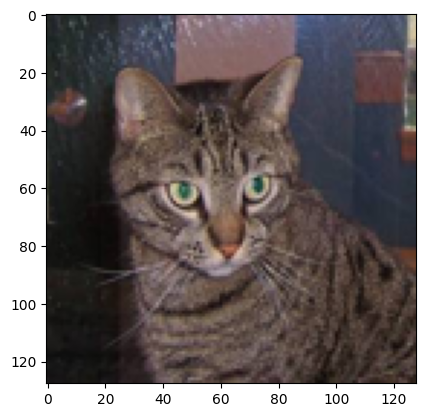

(128, 128)

In [25]:
# image processing
img = Image.open("/content/train/cat.1.jpg")
plt.imshow(img)
plt.show()
print(img.size)
img = img.resize((128,128))
plt.imshow(img)
plt.show()
img.size

In [26]:
# Image preprocessing function
def preprocess_image(image_path, target_size=(128, 128)):
    try:
        img = Image.open(image_path)
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0
        return img_array
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

In [27]:
# Counting the number of cat and dog images
cat_count = 0
dog_count = 0

for file in onlyfiles:
    if 'cat' in file:
        cat_count += 1
    elif 'dog' in file:
        dog_count += 1

print("Total cat images:", cat_count)
print("Total dog images:", dog_count)
print("Total images:", cat_count + dog_count)

Total cat images: 12500
Total dog images: 12500
Total images: 25000


In [42]:
# Creating labels for 5000 images (0 = cats, 1 = dogs)
labels = []
for i, file in enumerate(onlyfiles):
    if i >= 5000:
      break
    if 'cat' in file:
        labels.append(0)
    elif 'dog' in file:
        labels.append(1)

In [43]:
# Preprocessing and looping through the the 5000 images
images = []
for i in range(min(5000, len(onlyfiles))):
    file = onlyfiles[i]
    image_path = os.path.join(mypath, file)
    processed_image = preprocess_image(image_path)
    if processed_image is not None:
        images.append(processed_image)

In [44]:
# Converting the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# prompt: model is not performing well

# Model building
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data augmentation (optional but recommended)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)


# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10,  # Increase the number of epochs if needed
                    validation_data=(X_test, y_test))


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [46]:
# Model building
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In [48]:
# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 179ms/step - accuracy: 0.5063 - loss: 0.7121 - val_accuracy: 0.5670 - val_loss: 0.6849
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 135ms/step - accuracy: 0.5666 - loss: 0.6811 - val_accuracy: 0.6210 - val_loss: 0.6776
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.5927 - loss: 0.6763 - val_accuracy: 0.5770 - val_loss: 0.6655
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.6041 - loss: 0.6695 - val_accuracy: 0.6170 - val_loss: 0.6391
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.6141 - loss: 0.6604 - val_accuracy: 0.6370 - val_loss: 0.6311
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - accuracy: 0.6373 - loss: 0.6498 - val_accuracy: 0.6470 - val_loss: 0.6251
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.6464 - loss: 0.6425 - val_accuracy: 0.6600 - val_loss: 0.6103
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.6384 - loss: 0

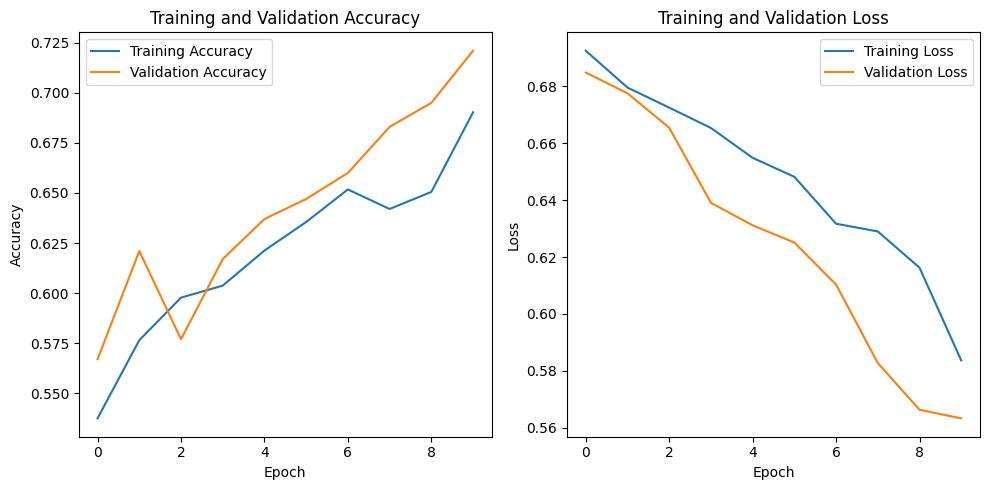

In [49]:
# Plot the training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [50]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5633
Test Accuracy: 0.7210


In [51]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


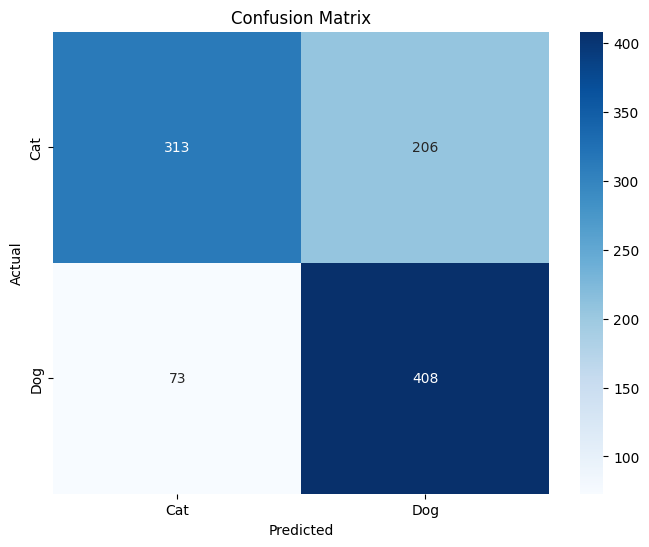

In [52]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()